In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import seaborn as sns
import os



In [2]:
telecom_cust = pd.read_csv('Telco-Customer-Churn.csv')

#### Part 1: Data Preprocessing
#### Part 2: Data Evaluation
#### Part 3: Model Selection
#### Part 4: Model Evaluation
#### Part 5: Model Improvement
#### Part 6: Future Predictions
#### Part 7: Model Deployment

' '

# Part 1: Data Preprocessing

In [3]:
telecom_cust.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telecom_cust.isnull().sum()
#there are 11 missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# remove missing vales
telecom_cust.dropna(inplace = True)
#check sum of isnull
telecom_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
telecom_cust.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

##### Note: filling missing values
Find the average and fill missing values programmatically: If we had any missing values in the numeric columns of the dataset, then we should find the average of each one of those columns and fill their missing values. Here’s a snippet of code to do the same step programmatically.

In [13]:
dataset = telecom_cust
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

## Identify unique values
When we look into the unique values in each categorical variables, we get an insight that the customers are either on a month-to-month rolling contract or on a fixed contract for one/two years. Also, they are paying bills via credit card, bank transfer or electronic checks.

In [14]:
#Unique values in each categorical variable:
telecom_cust["Contract"].nunique()

3

In [15]:
telecom_cust["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
telecom_cust["PaymentMethod"].nunique()

4

In [17]:
telecom_cust["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# Part 2: Data Evaluation

## Plot histogram of numeric Columns

In [18]:
# Removing the ID column
dataset = telecom_cust
dataset = dataset.iloc[:,1:]
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#Create a label encoder object
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

Row_list =[]

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            
            Row_list.append(col)
           
            le_count += 1
print('{} columns were label encoded.'.format(le_count)  + ' columns names: {}'.format(Row_list))

5 columns were label encoded. columns names: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [20]:
dataset['gender'].replace(to_replace='Male', value=1, inplace=True)
dataset['gender'].replace(to_replace='Female',  value=0, inplace=True)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


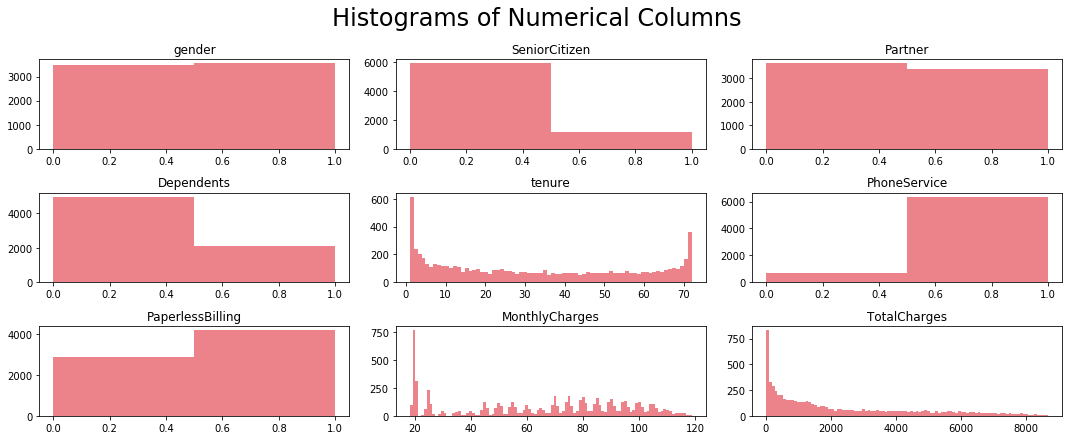

In [21]:
dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",
             fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- Gender distribution shows that the dataset features a relatively equal proportion of male and female customers. Almost half of the customers in our dataset are female whilst the other half are male.
- Most of the customers in the dataset are younger people.
- Not many customers seem to have dependents whilst almost half of the customers have a partner.
- There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer segment that stays for more than 70 months on average.
- Most of the customers seem to have phone service and 3/4th of them have opted for paperless Billing
- Monthly charges span anywhere between 18 to 118 per customer with a huge proportion of customers on 20 segment.

##  The distribution of various services used by customers (label encoded categorical variables)

In [22]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

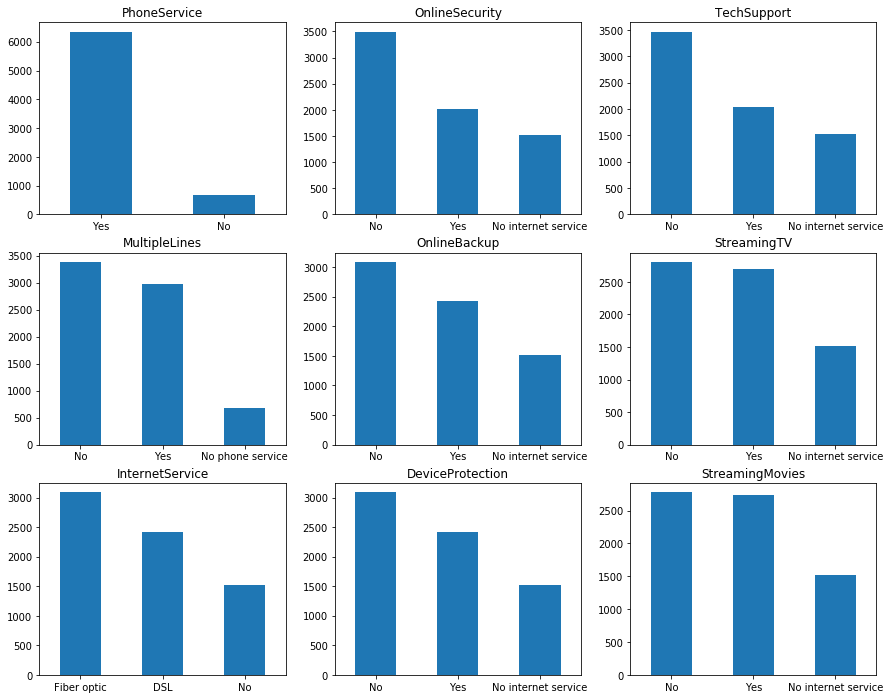

In [23]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

- Most of the customers have phone service out of which almost half of the customers have multiple lines.
- 3/4th of the customers have opted for internet service via Fiber Optic and DSL connections with almost half of the internet users subscribing to streaming TV and movies.
- Customers who have availed Online Backup, Device Protection, Technical Support and Online Security features are a minority.

## Partner and dependent status
About 50% of the customers have a partner, 30% of the total customers have dependents.

In [24]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
df3.T

variable          Dependents    Partner
           value                       
customerID No      70.150739  51.749147
           Yes     29.849261  48.250853

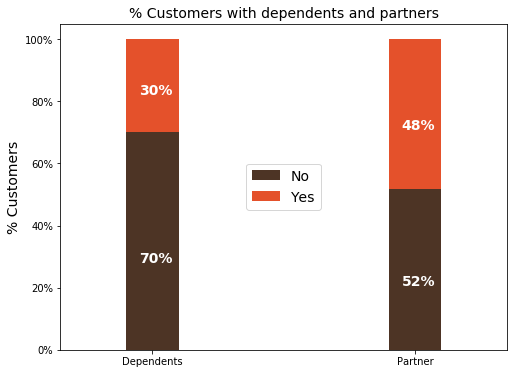

In [25]:

colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


##  Customers, who have partners, also have dependents

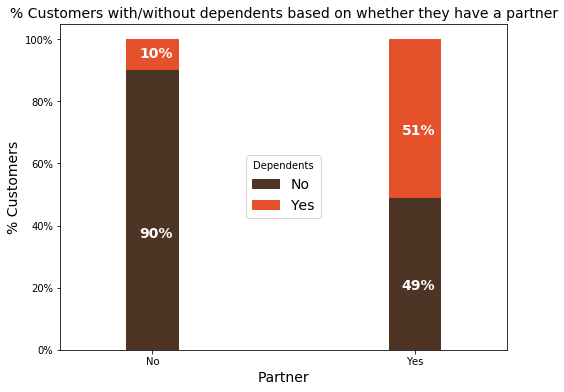

In [26]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

##  The number of customers by different contracts

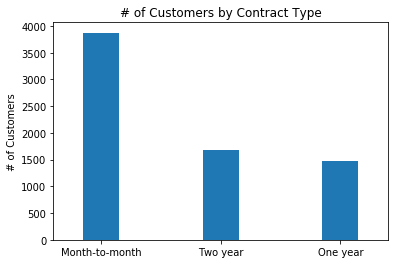

In [27]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')
plt.show()

## Tenure

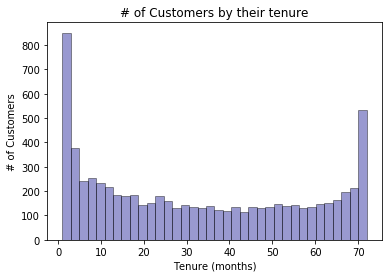

In [28]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')
plt.show()

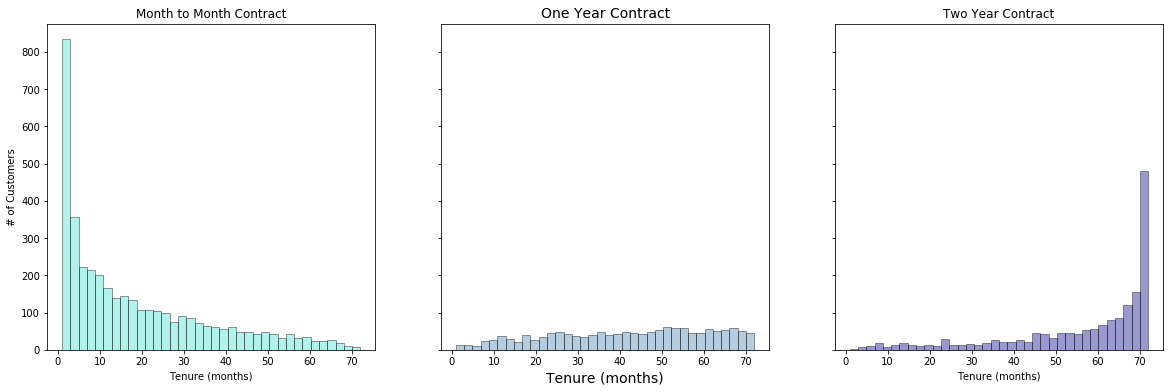

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')
plt.show()

# Churn

### Churn variable interaction with other variables

In [30]:
telecom_cust["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Rate')

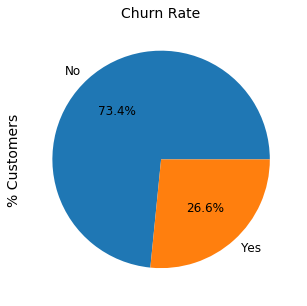

In [31]:
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )   


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn Rate', size = 14)

#### Churn by Monthly Charges
KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

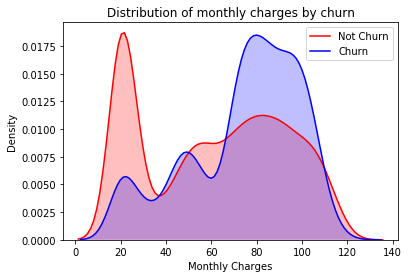

In [32]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == "No") ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == "Yes") ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

In [33]:
#Let's convert all the categorical variables into dummy variables
# removing customer id (to not be converted to dummies)

#Convertin the predictor variable in a binary numeric variable
telecom_cust['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom_cust['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = telecom_cust.iloc[:,1:]
df_dummies = pd.get_dummies(df_dummies)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [34]:
df_dummies.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contr

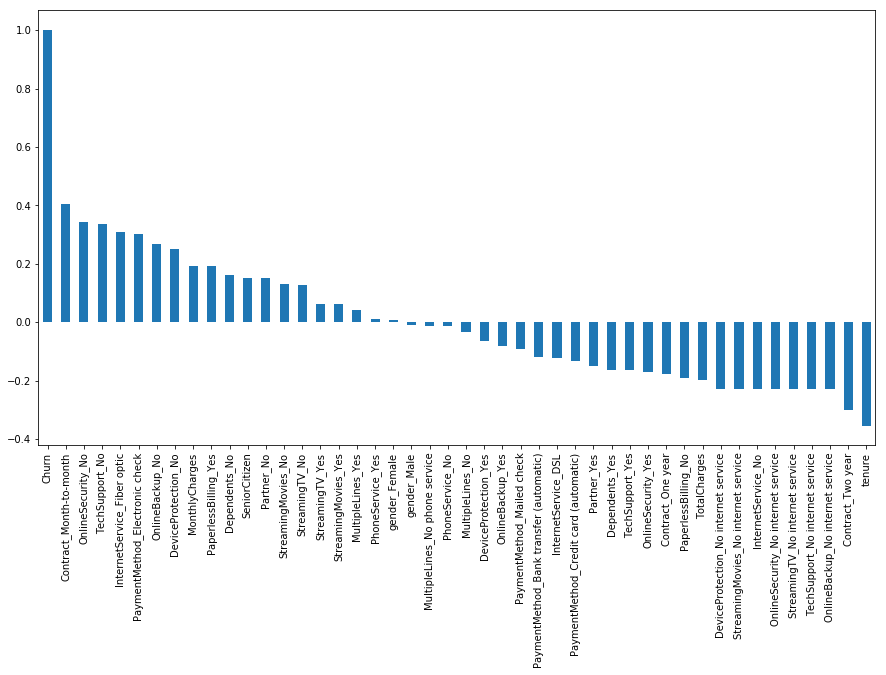

In [35]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Churn vs Tenure

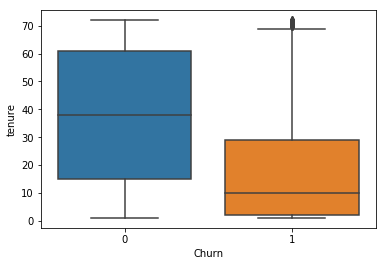

In [36]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

### Churn by Contract Type

In [37]:
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()
contract_churn

Churn,0,1
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


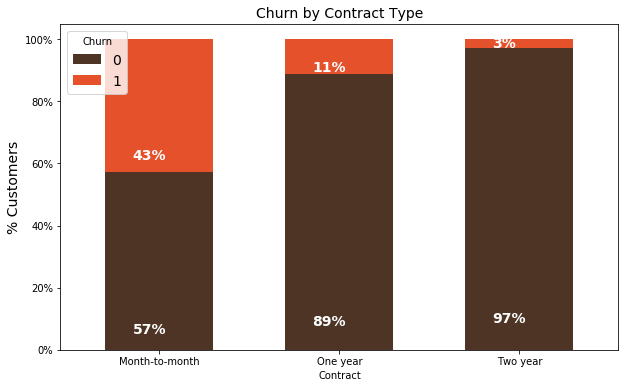

In [38]:
colors = ['#4D3425','#E4512B']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.6,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.09*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [39]:
PaymentMethod_churn = telecom_cust.groupby(['PaymentMethod','Churn']).size().unstack()
PaymentMethod_churn.T

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
0,1284,1289,1294,1296
1,258,232,1071,308


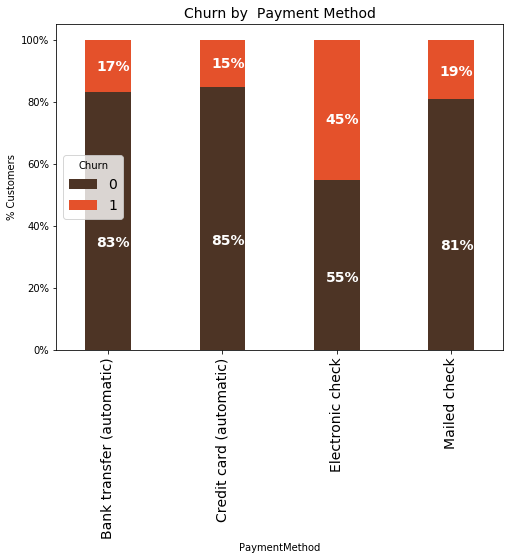

In [40]:
colors = ['#4D3425','#E4512B']

ax = (PaymentMethod_churn.T*100.0 / PaymentMethod_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.4,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_xticklabels(PaymentMethod_churn.T, rotation='vertical', size=14)
ax.set_title('Churn by  Payment Method',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### Churn Rate by Payment Method and Contact Type

In [41]:
contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()
contract_churn

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,589,543,1850,893
One year,391,398,347,336
Two year,562,580,168,375


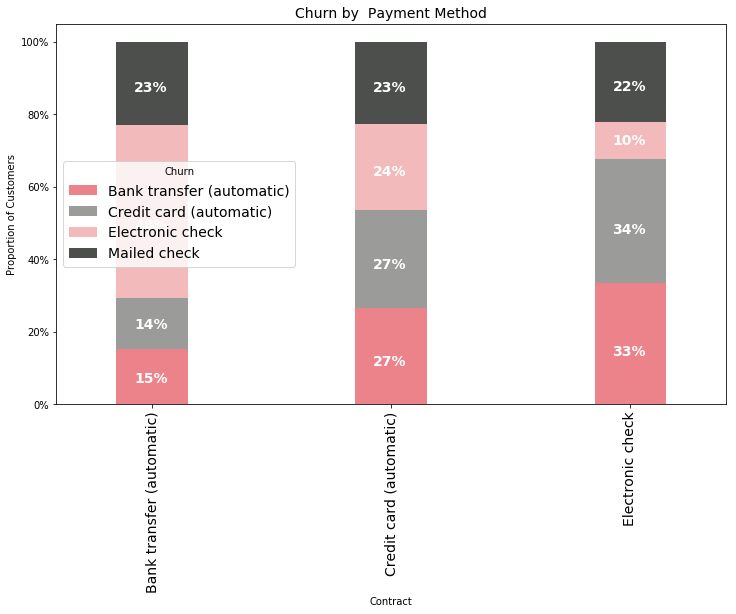

In [42]:
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),
color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left',prop={'size':14},title = 'Churn')
ax.set_ylabel('Proportion of Customers')
ax.set_xticklabels(PaymentMethod_churn.T, rotation='vertical', size=14)
ax.set_title('Churn by  Payment Method',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### Find positive and negative correlations

In [43]:
dataset2 = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PhoneService        0.011691
dtype: float64

Most Negative Correlations: 
 Partner        -0.149982
Dependents     -0.163128
TotalCharges   -0.199484
tenure         -0.354049
dtype: float64


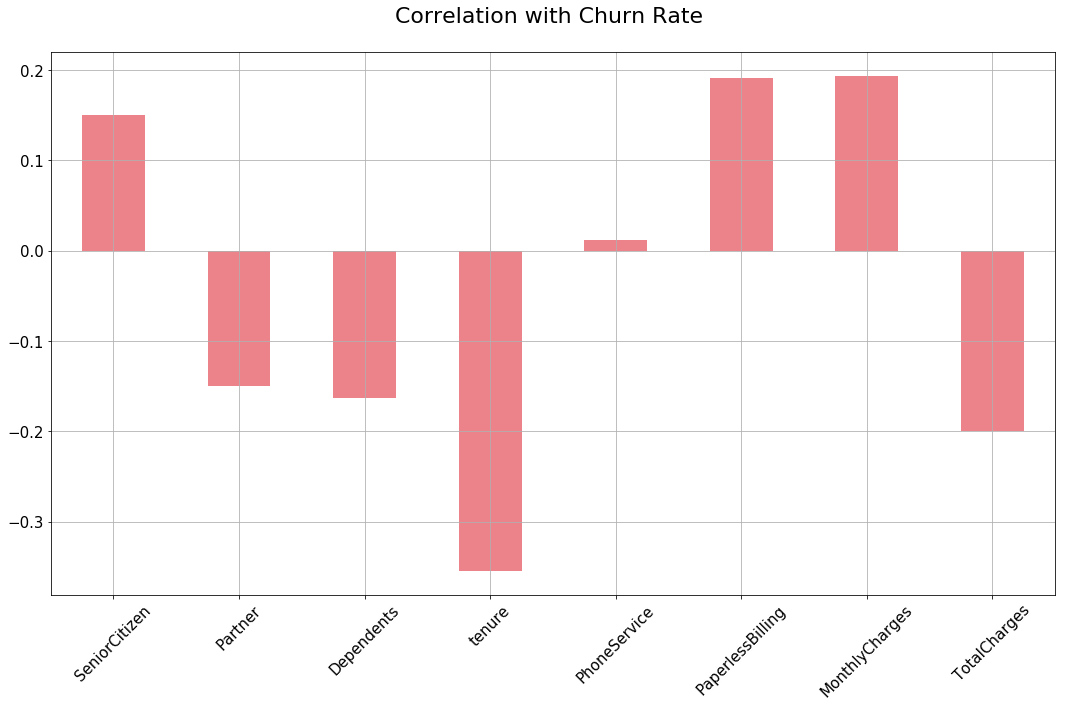

In [44]:
#Plot positive & negative correlations
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

## Plot Correlation Matrix of all independent variables
Correlation matrix helps us to discover the bivariate relationship between independent variables in a dataset.

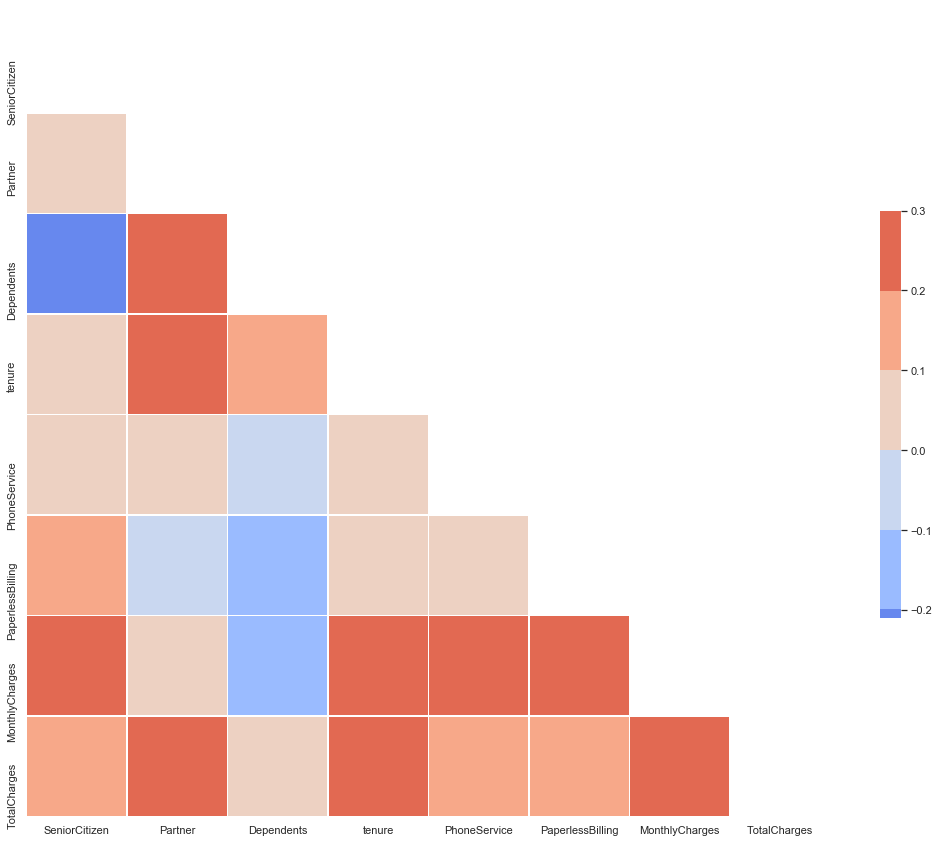

In [45]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = dataset2.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

cmap = sns.color_palette("coolwarm")

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, 
            cmap=cmap, 
            vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Check Multicollinearity using VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(dataset2)

,variables,VIF
0,SeniorCitizen,1.327866
1,Partner,2.813692
2,Dependents,1.916758
3,tenure,10.451417
4,PhoneService,7.881414
5,PaperlessBilling,2.815119
6,MonthlyCharges,13.840300
7,TotalCharges,12.451150


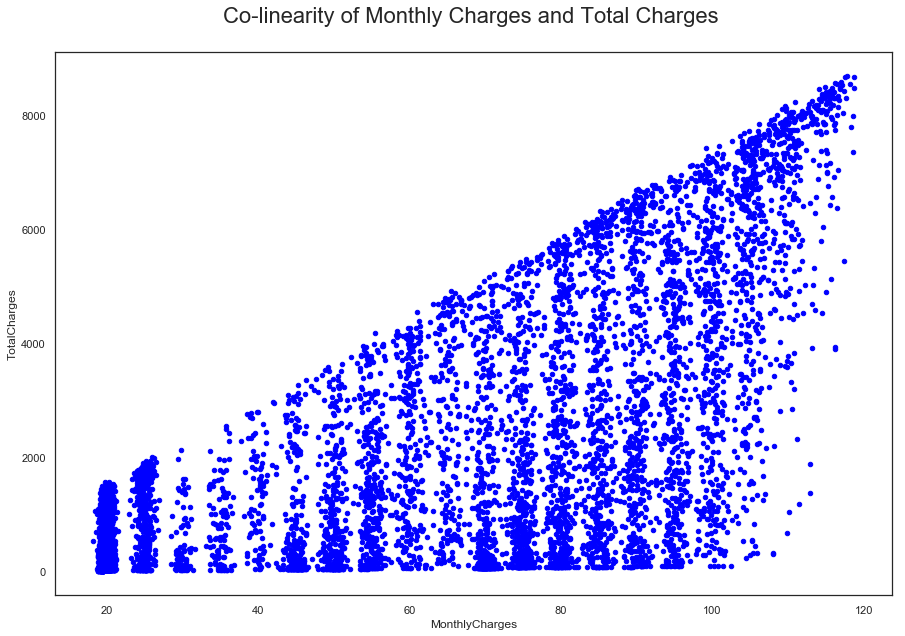

In [47]:
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x = 'MonthlyCharges', y='TotalCharges',
                                                         color =  'blue')
plt.title('Co-linearity of Monthly Charges and Total Charges \n',
          horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

In [48]:
#dropping TotalCharges:   
dataset2 = dataset2.drop(columns = "TotalCharges")

In [49]:
calc_vif(dataset2)

,variables,VIF
0,SeniorCitizen,1.322783
1,Partner,2.812721
2,Dependents,1.899884
3,tenure,3.286508
4,PhoneService,5.596376
5,PaperlessBilling,2.741617
6,MonthlyCharges,7.448061


Exploratory Data Analysis Concluding Remarks:
- The dataset does not have any missing or erroneous data values.
- Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with Partner, Dependents and Tenure.
- The dataset is imbalanced with the majority of customers being active.
- There is multicollinearity between Monthly Charges and Total Charges. Dropping Total Charges have decreased the VIF values considerably.
- Most of the customers in the dataset are younger people.
- There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old.
- Most of the customers seem to have phone service with Monthly charges spanning between 18 to 118 per customer.
- Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via electronic checks.

# Pandas Profiler

In [50]:
from pandas_profiling import ProfileReport

In [51]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [52]:
#profile = ProfileReport(df_dummies, title="Pandas Profiling Report")


In [53]:
#profile

# Predictive models

In [54]:
#dataset.head()
#telecom_cust.head()

In [55]:
identity = telecom_cust["customerID"]

#### Encode Categorical data

In [56]:
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)

In [57]:
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

## Split the dataset into dependent and independent variables

In [58]:
#Identify response variable:
    
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

In [59]:
# Generate training and test datasets of dependent and independent variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)


In [60]:
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5625, 41)
Number transactions y_train dataset:  (5625,)
Number transactions X_test dataset:  (1407, 41)
Number transactions y_test dataset:  (1407,)


#### Remove Identifiers

In [61]:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

#### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Part 3: Model Selection

## 3.1 Compare Baseline Classification Algorithms (1st Iteration)

In [63]:
# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

In [82]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, 
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0, gamma='scale')))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0, gamma='scale')))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier( n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []

recall_results = []
prec_results = []

names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD'
      , 'Recall'
      , 'Precision']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') # accuracy scoring
    
    #
    cv_recall_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall') # recall scoring
    cv_prec_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision') # precision scoring
    
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc') # roc_auc scoring

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    recall_results.append(cv_recall_results)
    prec_results.append(cv_prec_results)
   
    
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ,round(cv_recall_results.mean()*100, 2)
                         ,round(cv_prec_results.mean()*100, 2)
                           ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
#model_results

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Recall,Precision
0,Logistic Regression,84.31,1.28,74.74,1.12,80.42,51.56
1,SVC,83.28,1.45,79.88,1.52,53.23,64.78
6,Random Forest,82.22,1.58,78.76,2.15,49.11,62.92
4,Gaussian NB,81.68,1.68,69.58,1.51,84.00,46.03
2,Kernel SVM,79.49,2.04,79.95,1.81,49.06,66.77
3,KNN,73.57,2.00,74.51,2.30,49.79,52.18
5,Decision Tree Classifier,65.26,2.23,72.52,1.83,49.43,48.38


## 3.2 Visualize Classification Algorithms Accuracy Comparisons

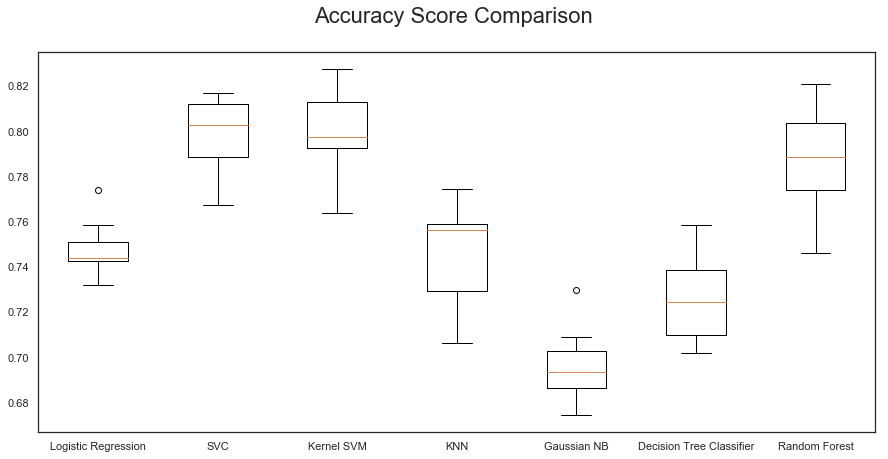

In [84]:
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

***Using Area under ROC Curve***: From the first iteration of baseline classification algorithms, we can see that Logistic Regression and SVC have outperformed the other five models for the chosen dataset with the highest mean AUC Scores.

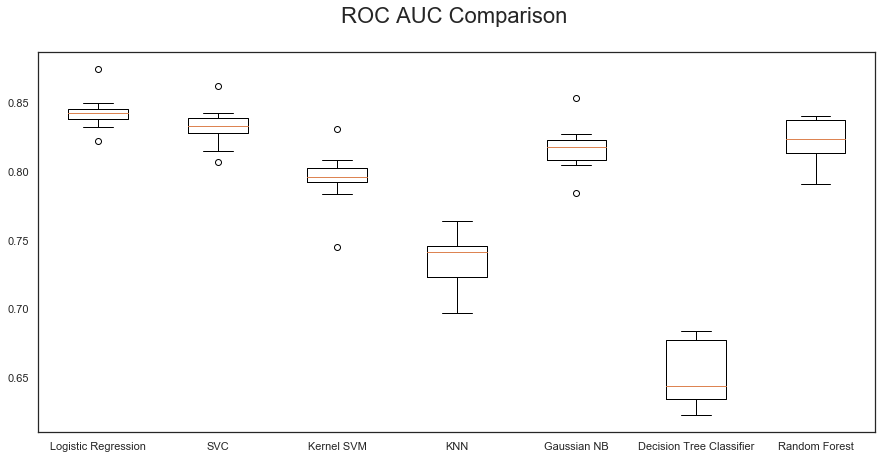

In [85]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

## 3.3 Getting the right parameters for the baseline models
Optimising the parameters before doing the second iteration, and finalising the evaluation metrics for model selection.

### 3.3.1 Identify the optimal number of K neighbors for KNN Model
In the first iteration, we assumed that K = 3, but in reality, we don’t know what is the optimal K value that gives maximum accuracy for the chosen training dataset. Therefore, let us write a for loop that iterates 20 to 30 times and gives the accuracy at each iteration so as to figure out the optimal number of K neighbors for the KNN Model.

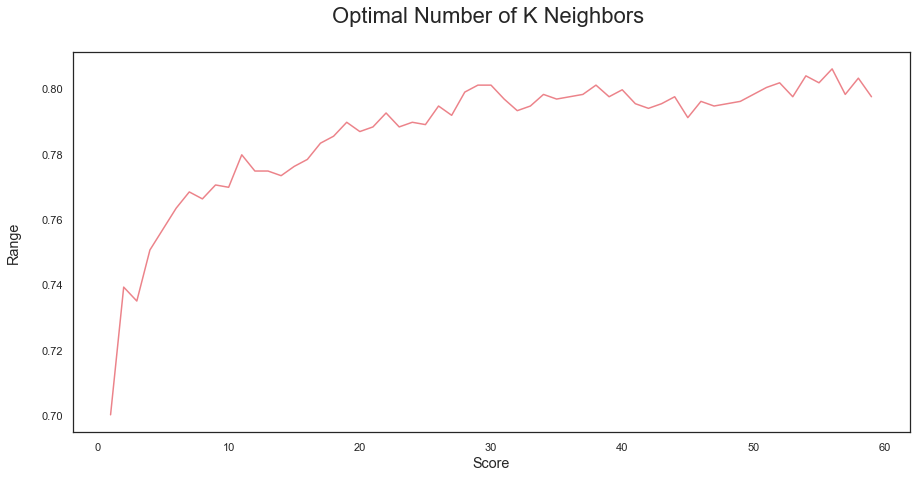

In [86]:
#Identify optimal number of K neighbors for KNN Model:


score_array = []
for each in range(1,60):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor from 1 to 24
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,60),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

#optimal number of K neigbors = 22

### 3.3.2 Identify optimal number of trees for Random Forest Model

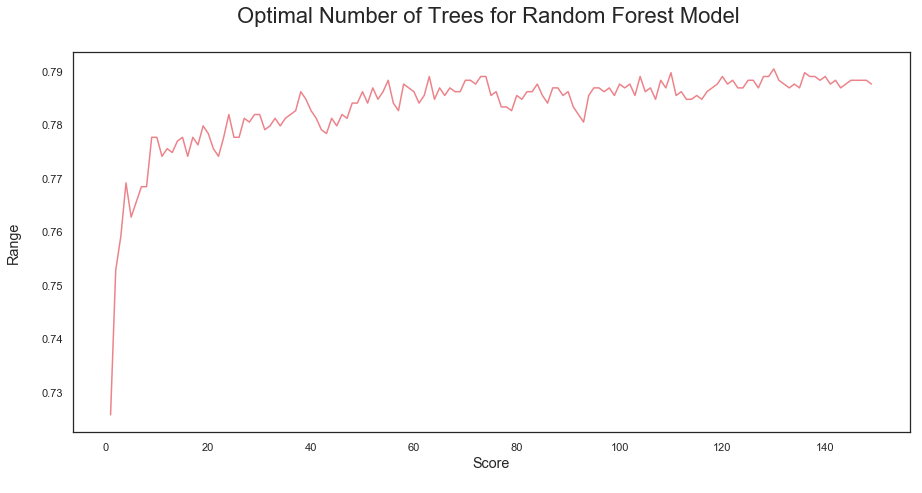

In [87]:

#Identify optimal number of trees for Random Forest Model:
 
score_array = []
for each in range(1,150):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,150),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()
 
 
#Optimal number of decision trees = 72

## 3.4 Compare Baseline Classification Algorithms (2nd Iteration)

In the second iteration of comparing baseline classification algorithms, we would be using the optimised parameters for KNN and Random Forest models.

In [88]:
results=[]

### 3.4.1 Logistic Regression

In [89]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(solver='liblinear', random_state = 0, class_weight='') #class_weight='balanced' or 'None'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
#print (results)

### 3.4.2 Support Vector Machine (linear classifier)

In [90]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
#print (results)

### 3.4.3 K-Nearest Neighbors

In [91]:
classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
#print (results)

### 3.4.4 Kernel SVM

In [92]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
#print (results)

### 3.4.5 Naive Byes

In [93]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
#print (results)

### 3.4.6 Decision Tree

In [94]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
#print (results)

### 3.4.7 Random Forest

In [95]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
#print (results)

In [96]:
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.808102   0.667742  0.553476  0.605263  0.573090
1          SVM (Linear)  0.813077   0.679612  0.561497  0.614934  0.581717
2  K-Nearest Neighbours  0.792466   0.631410  0.526738  0.574344  0.544801
3            Kernel SVM  0.801706   0.680608  0.478610  0.562009  0.508812
4            Naive Byes  0.706468   0.470765  0.839572  0.603266  0.725844
5         Decision Tree  0.737740   0.506361  0.532086  0.518905  0.526734
6         Random Forest  0.792466   0.645390  0.486631  0.554878  0.511811


From the 2nd iteration, we can conclude that logistic regression is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives.
The Logistic Regression will be used to evaluate performance in the forthcoming sections.

# Part 4: Model Evaluation

## 4.1 Train & evaluate Chosen Model


The shrinkage of the coefficients is achieved by penalizing the regression model with a penalty term called L2-norm, which is the sum of the squared coefficients. The amount of the penalty can be fine-tuned using a constant called lambda (λ). Selecting a good value for λ is critical.
A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these two is the penalty term. Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.

In [104]:
# Fit Logistic Regression on the Training dataset:
    
classifier = LogisticRegression(solver='liblinear', random_state = 0
                               # , penalty = 'l2'
                               )
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.808102   0.667742  0.553476  0.605263   0.57309


## 4.2 k-Fold Cross-Validation

In [105]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.80 (+/- 0.02)


## 4.3 Confusion Matrix

In [106]:
confusion_matrix(y_test, y_pred) 

array([[930, 103],
       [167, 207]], dtype=int64)

Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

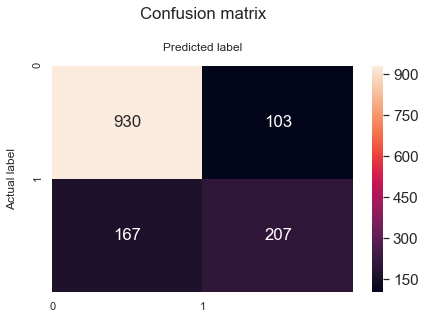

In [100]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

## 4.4 Evaluate the model using ROC Graph

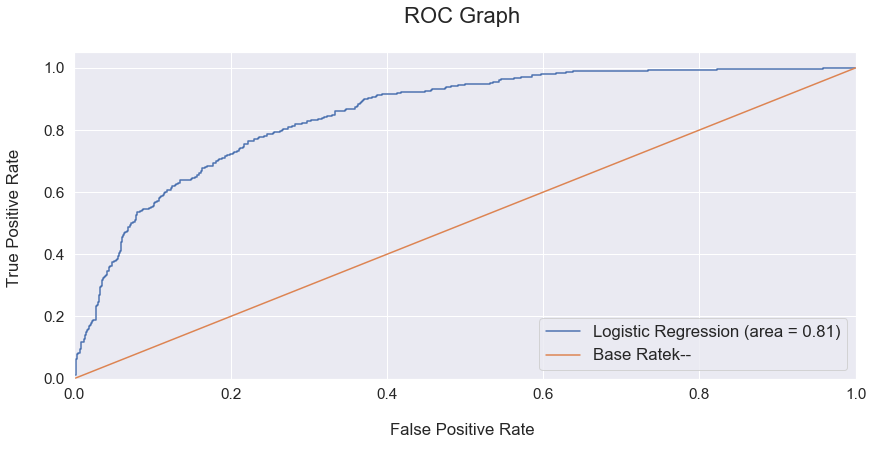

In [107]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far away from that line as possible. As shown in the graph, the fine-tuned Logistic Regression model showcased a higher AUC score.

## 4.5 Predict Feature Importance

In [108]:
# Analyzing Coefficients
feature_importances = pd.concat([ pd.DataFrame(dataset.drop(columns = 'customerID').columns,
                                columns = ["features"]),
                                pd.DataFrame(np.transpose(classifier.coef_),
                                columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
8,TotalCharges,0.773430
33,Contract_Month-to-month,0.283408
13,InternetService_Fiber optic,0.228637
6,PaperlessBilling,0.157195
38,PaymentMethod_Electronic check,0.130000
24,TechSupport_No,0.112646
15,OnlineSecurity_No,0.104922
29,StreamingTV_Yes,0.084703
32,StreamingMovies_Yes,0.081961
1,SeniorCitizen,0.078947


# Part 5: Model Improvement

## 5.1 Hyper parameter Tuning via Grid Search
Hyperparameter parameters are a set of configurable values external to a model that cannot be determined by the data, and that we are trying to optimize through Parameter Tuning techniques like Random Search or Grid Search.

In [109]:
# Round 1
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)

Took 11.74 seconds


(0.7537075526377085, {'C': 0.001, 'penalty': 'l2'})

In [110]:
# Round 2    

# Select Regularization Method
import time
penalty = ['l2']

# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)

Took 1.02 seconds


(0.7537075526377085, {'C': 0.001, 'penalty': 'l2'})

## 5.2 Final Hyperparameter tuning and selection

In [111]:
# Round 3
# Final Hyper parameter tuning and selection 

lr_classifier = LogisticRegression(solver='liblinear', random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

# Part 6: Future Predictions

## 6.1 Compare predictions against the test set

In [112]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[930 103]
 [167 207]]


In [113]:
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,166,40
1,63,16


Test Data Accuracy: 0.8081


<Figure size 2016x1440 with 0 Axes>

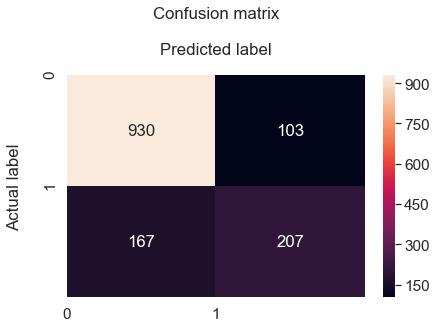

In [114]:

#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.show()

## 6.2 Format Final Results

In [115]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["propensity_to_convert(%)"] = y_pred_probs 

final_results["propensity_to_convert(%)"] = final_results["propensity_to_convert(%)"]*100

final_results["propensity_to_convert(%)"]=final_results["propensity_to_convert(%)"].round(2)

final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_convert(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

print (final_results)

      customerID  Churn  predictions  propensity_to_convert(%) Ranking
5134  8010-EZLOU      1            1                     65.02       2
2428  2519-FAKOD      1            0                     46.17       3
2503  9067-SQTNS      0            0                      1.04      10
3119  5307-DZCVC      1            1                     52.31       2
2534  8565-HBFNN      0            0                      6.37       7
...          ...    ...          ...                       ...     ...
2356  3450-WXOAT      0            0                      9.63       7
3643  9451-WLYRI      0            0                      0.77      10
6713  4989-LIXVT      0            0                     33.47       4
6627  1074-WVEVG      0            0                      0.59      10
6019  0440-MOGPM      0            0                     18.03       6

[1407 rows x 5 columns]


# Part 7: Future Predictions

In [ ]:
#filename = 'final_model.model'
#i = [lr_classifier]
#joblib.dump(i,filename)